In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt

In [46]:
def read_results(results_dir, dataset='val'):
    
    # read arrays
    preds = np.load(os.path.join(results_dir,  f'{dataset}_predictions.npy'))
    obs = np.load(os.path.join(results_dir,  f'{dataset}_targets.npy'))
    
    # reshape arrays
    preds = preds.squeeze().transpose(1, 0, 2)
    obs = obs.squeeze().transpose(1, 0, 2)

    return preds, obs

In [92]:
# High-res
gino_vl_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing/gino_predictions_20260117_120324'
gino_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing_standard_loss/gino_predictions_20260117_115735'
fno_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/FNO_predictions/forcing/fno_predictions_20260117_130905'

# Low-res
# gino_vl_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing/gino_predictions_20260117_131833'
# gino_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing_standard_loss/gino_predictions_20260117_131908'
# fno_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/FNO_predictions/forcing/fno_predictions_20260117_134440'

In [93]:
def compute_mae(x, y):
    mae = []
    for idx in range(y.shape[-1]):
        mae.append(np.mean(np.abs(x[...,idx] - y[...,idx]), axis=-1))
    return np.array(mae)


def compute_var(y):
    var = []
    for idx in range(y.shape[-1]):
        var.append(np.var(y[...,idx], axis=-1))
    return tuple(var)

In [94]:
dataset = 'train'
gino_vl_preds, gino_vl_obs = read_results(gino_vl_dir, dataset)
gino_preds, gino_obs = read_results(gino_dir, dataset)
fno_preds, fno_obs = read_results(fno_dir, dataset)

fno_mae = compute_mae(fno_preds, fno_obs)
gino_mae = compute_mae(gino_preds, gino_obs)
gino_vl_mae = compute_mae(gino_vl_preds, gino_vl_obs)

print(fno_mae.shape, gino_mae.shape, gino_vl_mae.shape)

(2, 61360) (2, 61360) (2, 61360)


In [95]:
print(dataset)
print('FNO', fno_mae.mean(1)/fno_obs.mean(axis=(0, 1)), fno_mae.std(1)/fno_obs.std(axis=(0, 1)))
print('GINO', gino_mae.mean(1)/fno_obs.mean(axis=(0, 1)), gino_mae.std(1)/fno_obs.std(axis=(0, 1)))
print('GINO-VL', gino_vl_mae.mean(1)/fno_obs.mean(axis=(0, 1)), gino_vl_mae.std(1)/fno_obs.std(axis=(0, 1)))

train
FNO [0.09743042 0.13239689] [0.16015721 0.22101525]
GINO [0.08346498 0.11210341] [0.15636548 0.17993287]
GINO-VL [0.08259124 0.11530693] [0.16439141 0.19084599]


In [96]:
dataset = 'val'

gino_vl_preds, gino_vl_obs = read_results(gino_vl_dir, dataset)
gino_preds, gino_obs = read_results(gino_dir, dataset)
fno_preds, fno_obs = read_results(fno_dir, dataset)

fno_mae = compute_mae(fno_preds, fno_obs)
gino_mae = compute_mae(gino_preds, gino_obs)
gino_vl_mae = compute_mae(gino_vl_preds, gino_vl_obs)

In [97]:
print(dataset)
print(fno_mae.mean(1)/fno_obs.mean(axis=(0, 1)), fno_mae.std(1)/fno_obs.std(axis=(0, 1)))
print(gino_mae.mean(1)/fno_obs.mean(axis=(0, 1)), gino_mae.std(1)/fno_obs.std(axis=(0, 1)))
print(gino_vl_mae.mean(1)/fno_obs.mean(axis=(0, 1)), gino_vl_mae.std(1)/fno_obs.std(axis=(0, 1)))

val
[0.10436518 0.13815079] [0.17327567 0.23468093]
[0.08593556 0.11832122] [0.1680087  0.19528393]
[0.08622868 0.12051379] [0.17696102 0.20420191]


In [68]:
fno_mae.shape, fno_obs.mean(axis=(0, 1)).shape

((2, 10227), (2,))

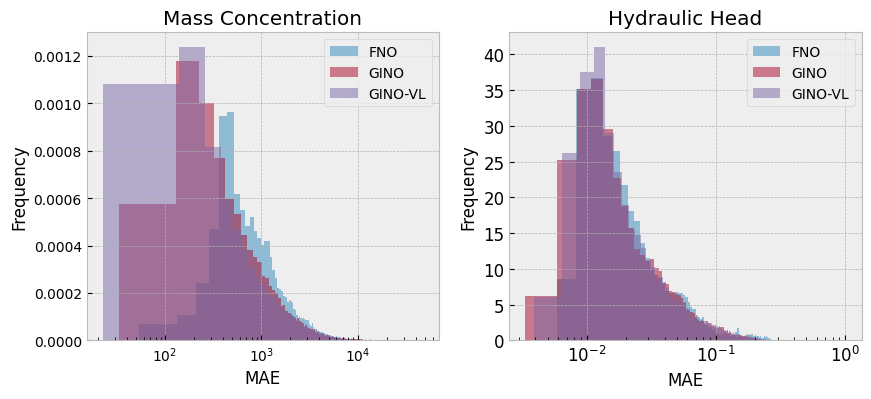

In [37]:
import matplotlib as mpl

mpl.style.use('bmh')

target_cols = ['Mass Concentration', 'Hydraulic Head']

fig, ax = plt.subplots(1, len(target_cols), figsize=(10, 4))

for col_idx, col_name in enumerate(target_cols):

    ax[col_idx].hist(fno_mae[col_idx], bins=400, label='FNO', alpha=0.5, density=True)
    ax[col_idx].hist(gino_mae[col_idx], bins=400, label='GINO', alpha=0.5, density=True)
    ax[col_idx].hist(gino_vl_mae[col_idx], bins=400, label='GINO-VL', alpha=0.5, density=True)
    ax[col_idx].legend()
    ax[col_idx].set_ylabel('Frequency')
    # if col_idx == (len(target_cols)-1):
    ax[col_idx].set_xlabel('MAE')
    ax[col_idx].set_xscale('log')
    ax[col_idx].set_title(f"{col_name}")
    
    
    # ax[col_idx, 1].scatter(obs_var[col_idx], fno_mae[col_idx], s=3, label='FNO', alpha=0.6)
    # ax[col_idx, 1].scatter(obs_var[col_idx], gino_mae[col_idx], s=3, label='GINO', alpha=0.6)
    # ax[col_idx, 1].scatter(obs_var[col_idx], gino_vl_mae[col_idx], s=3, label='GINO-VL', alpha=0.6)
    # ax[col_idx, 1].legend()
    # if col_idx == (len(target_cols)-1):
    #     ax[col_idx, 1].set_xlabel('Temporal Variance')
    # ax[col_idx, 1].set_ylabel('MAE')
    # ax[col_idx, 1].set_xscale('log')
    # ax[col_idx, 1].set_title(f"{col_name}")

plt.xticks(fontsize=12)
_=plt.yticks(fontsize=12)
fig.savefig('high_res_hist_comparison.png', bbox_inches='tight')

In [7]:
import scipy

In [40]:
(fno_obs == gino_obs).all()

True

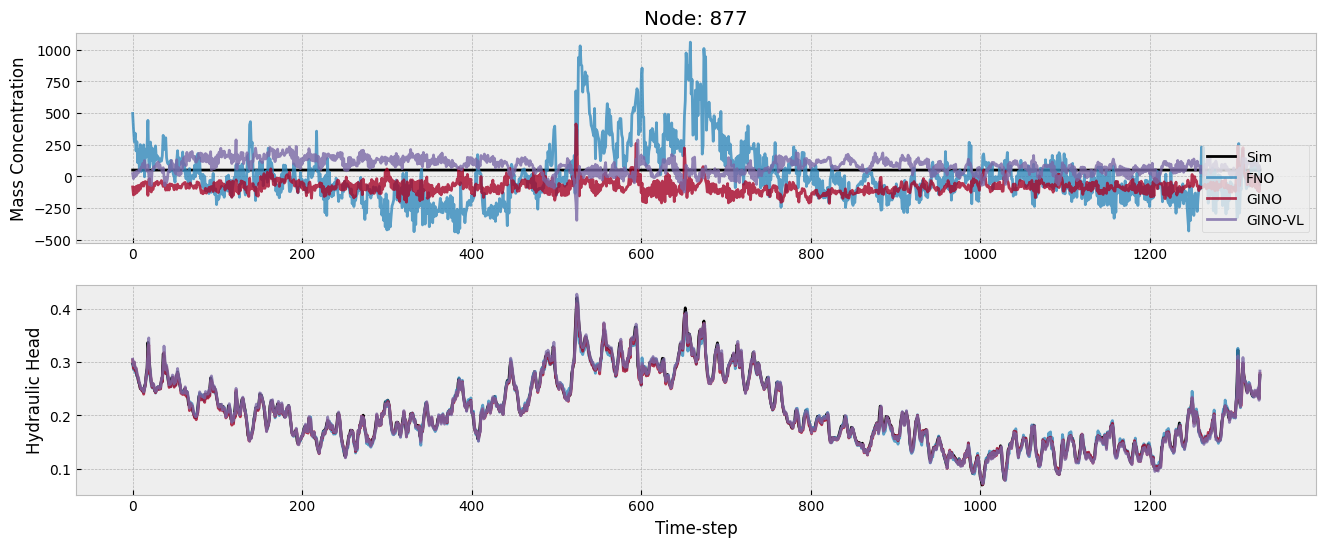

In [91]:
# randn_idx = np.random.choice(np.arange(len(obs)), p=scipy.special.softmax(obs_var[0]))
obs_var = compute_var(fno_obs)
randn_idx = np.argsort(obs_var[0])[int(len(fno_obs)/8*1)]
# randn_idx = 3271

fig, ax = plt.subplots(len(target_cols), 1,  figsize=(16, 6))


for col_idx, col_name in enumerate(target_cols):

    ax[col_idx].plot(fno_obs[randn_idx, :, col_idx], label='Sim', c='black')
    ax[col_idx].plot(fno_preds[randn_idx, :, col_idx], label='FNO',  alpha=0.8)
    ax[col_idx].plot(gino_preds[randn_idx, :, col_idx], label='GINO',  alpha=0.8)
    ax[col_idx].plot(gino_vl_preds[randn_idx, :, col_idx], label='GINO-VL', alpha=0.8)

    if col_idx==0:
        ax[col_idx].legend(loc=1, bbox_to_anchor=(1, 0.5))
        ax[col_idx].set_title(f"Node: {randn_idx+1}")
    else:
        ax[col_idx].set_xlabel('Time-step')
        
    ax[col_idx].set_ylabel(col_name)
    # if col_idx == (len(target_cols)-1):

    # ax[col_idx].set_yscale('log')

fig.savefig('lineplot.png', bbox_inches='tight')


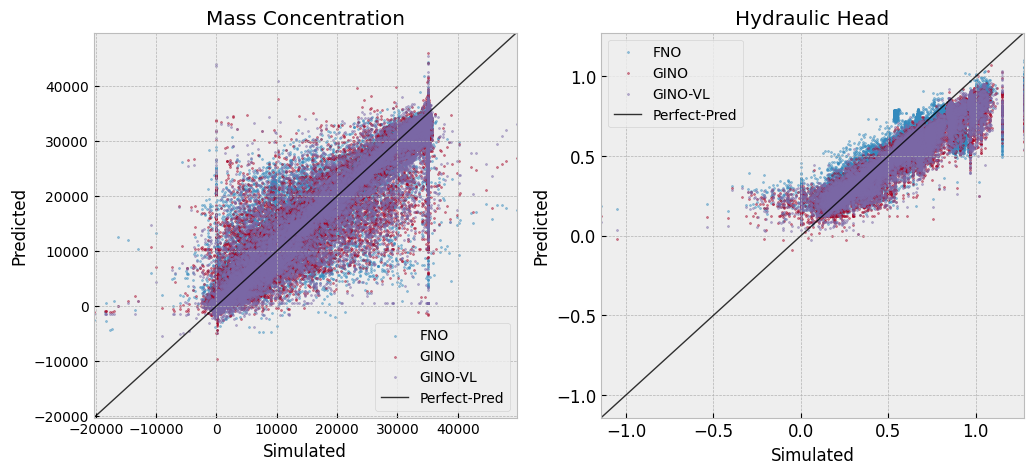

In [33]:
fig, ax = plt.subplots(1, len(target_cols),  figsize=(12, 5))


for col_idx, col_name in enumerate(target_cols):

    low_lim = min(obs[:, -1, col_idx].min(), fno_preds[:, -1, col_idx].min())
    up_lim = max(obs[:, -1, col_idx].max(), fno_preds[:, -1, col_idx].max())
    x = np.linspace(low_lim, up_lim, 100)
    

    ax[col_idx].scatter(obs[:, -1, col_idx].flatten(), fno_preds[:, -1, col_idx].flatten(), s=2, label='FNO', alpha=0.5)
    ax[col_idx].scatter(obs[:, -1, col_idx].flatten(), gino_preds[:, -1, col_idx].flatten(), s=2, label='GINO', alpha=0.5)
    ax[col_idx].scatter(obs[:, -1, col_idx].flatten(), gino_vl_preds[:, -1, col_idx].flatten(), s=2, label='GINO-VL', alpha=0.5)
    ax[col_idx].plot(x, x, label='Perfect-Pred', linewidth=1, c='black', alpha=0.8)


    ax[col_idx].set_xlim(low_lim, up_lim)
    ax[col_idx].set_ylim(low_lim, up_lim)

    ax[col_idx].set_xlabel('Simulated')
    ax[col_idx].set_ylabel('Predicted')
    ax[col_idx].legend()
        
    ax[col_idx].set_title(col_name)

plt.xticks(fontsize=12)
_=plt.yticks(fontsize=12)

fig.savefig('scatterplot.png', bbox_inches='tight')

In [41]:
import torch

In [51]:
model_path_dict = {'gino':'/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO/forcing/training_20260114_110144/checkpoints/latest_checkpoint.pth',
              'fno': '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/FNO/forcing/training_20260116_090922/checkpoints/latest_checkpoint.pth'}

for model, model_path in model_path_dict.items():
    checkpoint = torch.load(model_path, map_location=torch.device('cpu'))
    num_elements_in_state_dict = sum(p.numel() for p in checkpoint['model_state_dict'].values())
    print(model, num_elements_in_state_dict)

gino 33701008
fno 33663298
